<a href="https://colab.research.google.com/github/usneek/Mural-Restoration/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 
from keras.applications.vgg16 import VGG16 
from keras.models import Model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [ ]:
path = 'drive/MyDrive/CEERI SOP/Clean'
images = []
count=0;
with os.scandir(path) as files:
    for file in files:
        images.append(path+'/'+file.name)
        count+=1;

print(count)

246


In [ ]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

553476096/553467096 [==============================] - 4s 0us/step


In [ ]:
def extract_features(file, model):
    img = load_img(file, target_size=(224,224))
    img = np.array(img) 
    reshaped_img = img.reshape(1,224,224,3) 
    imgx = preprocess_input(reshaped_img)
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [ ]:
data = {}
for image in images:
    feat = extract_features(image,model)
    data[image] = feat

In [ ]:
len(data)

246

In [ ]:
data[images[0]].size

4096

In [ ]:
filenames = np.array(list(data.keys()))
feat = np.array(list(data.values()))
feat = feat.reshape(-1,4096)

In [ ]:
pca = PCA(n_components=50, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [ ]:
kmeans = KMeans(n_clusters=10,n_jobs=-1, random_state=22)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)

In [ ]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

In [ ]:
from PIL import Image
def separation(cluster):
  files=groups[cluster]
  j=0;
  for index,file in enumerate(files):
    img=load_img(file,target_size=(224,224))
    img=np.array(img)
    im = Image.fromarray(img.astype('uint8'))
    im.save('drive/MyDrive/CEERI SOP/Cluster_'+str(cluster)+'/'+str(j)+'.jpg')
    j+=1


In [ ]:
for i in range(10):
  separation(i)

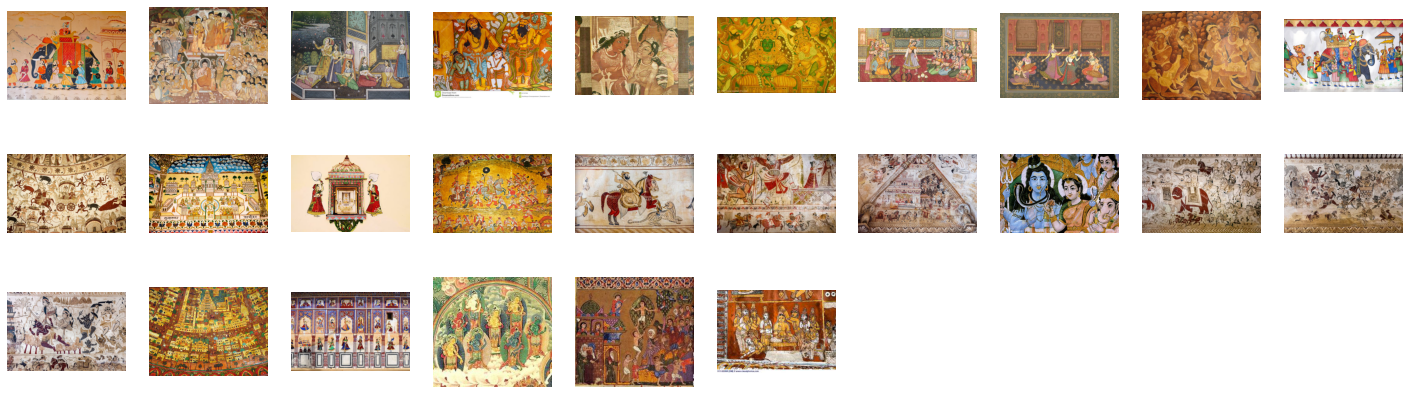

In [ ]:
view_cluster(1)